## Problem Metadata (JSON Block; the metadata and course context MUST be in the first cell)

```json
{
    "problem_title": "nitrogenInternalEnergyPressureVolumePlot",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["medium"],
    "topic": "Properties",
    "lecture_reference": {
        "lecture_id": "1_r5zqwxag",
        "subtopics": [
            {
                "key": "Fa25-L1b-8.0",
                "title": "Determining the properties of nitrogen",
            }
        ]
    },
    "book_reference": {
        "chapter_number": 3,
        "title": "Properties of Pure Substances",
        "sections": [
            "Property Diagrams for Phase-Change Processes",
            "The Ideal-Gas Equation of State"
        ]
    },
    "notes": ""
}
```

## 1. Problem Statement
We know that with two independent properties of a pure substance, we can determine a third dependent property. Show that there are additional properties at that same state, which are defined by the derivatives of the surface at that point. 

## 2. Schematic
Consider a pure substance.

## 3. Assumptions and Approximations
* **State Postulate** The state postulate allows a finite number of properties to be specified in order to fully describe a state of thermodynamic equilibrium.

## 4. Physical Laws and Governing Equations
It can be shown that for a pure substance, that the internal energy only depends upon:

$$U = (S,V) $$

where $S$ is entropy and $V$ is volume. These are both extensive properties. We can write the full differential as:

$$dU = \left( \frac{\partial U}{\partial V} \right)_S dV + \left( \frac{\partial U}{\partial S} \right)_V dS $$

These partial derivatives are then the corresponding intensive properties to the extensive properties:

$$ \left( \frac{\partial U}{\partial V} \right)_S = - p$$

$$ \left( \frac{\partial U}{\partial S} \right)_V = T$$

What we need then is to define the internal energy as a function of $S$ and $V$, define a point on the $U(S,V)$ surface, and take the derivatives at that point. 

In [2]:
# 5. Properties (Code Cell)
!pip install pyCalor numpy matplotlib
from pyCalor import thermo as th

import numpy as np
import matplotlib.pyplot as plt

substance = "Nitrogen"

T1_K = 200
T2_K = 1000

p1_Pa = 1000

## 5. Properties (Code Cell)

st1 = th.state(substance, T=T1_K, p=p1_Pa/1000, name="1")
st2 = th.state(substance, T=T2_K, p=p1_Pa/1000, name="2")

S12 = np.linspace(st1.s-.8, st2.s)

Text(0, 0.5, 'u (kJ/kg)')

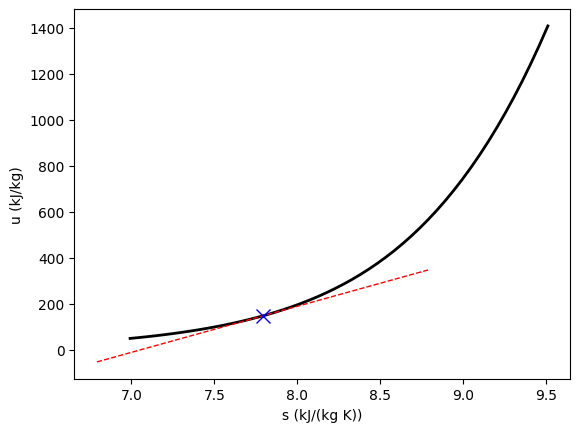

In [3]:
# 6 Calculations (Code Cell)
U12 = [st.u for st in [th.state(substance, v=st1.v, s=s) for s in S12]]
plt.plot(S12,U12, 'k-', lw=2)
b = st1.u - st1.T*st1.s
S1_ = np.linspace(st1.s-1, st1.s+1)
U_T = st1.T*S1_ + b
plt.plot(S1_,U_T, 'r--', lw=1)
plt.plot(st1.s,st1.u,marker='x',markersize=10,markerfacecolor='blue', markeredgecolor='blue', )

# y = m*x + b
# m = 1680
# b = y - m*x

plt.xlabel('s (kJ/(kg K))')
plt.ylabel('u (kJ/kg)')
# plt.savefig('u-s_const_v.png')

Text(0, 0.5, 'u (kJ/kg)')

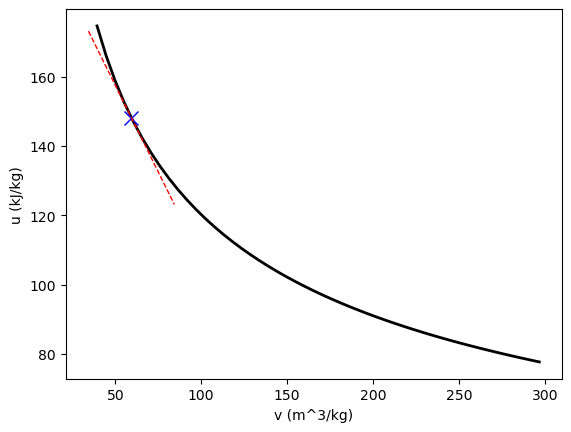

In [6]:
# 6 Calculations continued (Code Cell)

v12 = np.linspace(st2.v, st1.v-20)
U12_ = [st.u for st in [th.state(substance, v=v, s=st1.s) for v in v12]]
plt.plot(v12,U12_, 'k-', lw=2)

plt.plot(st1.v,st1.u,marker='x',markersize=10,markerfacecolor='blue', markeredgecolor='blue', )

b_ = st1.u + (st1.p)*st1.v

V1_ = np.linspace(st1.v-25, st1.v+25)
U_p = -st1.p*V1_ + b_
plt.plot(V1_,U_p, 'r--', lw=1)

plt.xlabel('v (m^3/kg)')
plt.ylabel('u (kJ/kg)')
# plt.savefig('u-v_const_s.png')

## 7. Summary and Reasoning
Here we see that $p = -\left(\frac{\partial U}{\partial V} \right)_S$ and $T = \left(\frac{\partial U}{\partial S} \right)_V$ demonstrating that we know more than just specific internal energy, $U$, by knowing specific volume, $V$, and specific entropy, $S$. 

THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---